In [1]:
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,hour,new_time_again,year,month
0,1,2015-01-01,2023-03-27 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,11,11:38:36,2015,1
1,77,2015-01-02,2023-03-27 12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,12,12:22:46,2015,1
2,146,2015-01-03,2023-03-27 14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,14,14:22:10,2015,1
3,163,2015-01-03,2023-03-27 16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,16,16:54:54,2015,1
4,247,2015-01-04,2023-03-27 20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Sunday,20,20:55:29,2015,1


In [4]:
data.nunique()

order_id            21350
date                  358
time                16382
order_details_id    48620
pizza_id               91
quantity                4
pizza_type_id          32
size                    5
price                  25
name                   32
category                4
ingredients            32
day                     7
hour                   15
new_time_again      16382
year                    1
month                  12
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
 12  day               48620 non-null  object 
 13  hour              48620 non-null  int64  
 14  new_time_again    48620 non-null  object 
 15  year              48620 non-null  int64  
 16  month             48620 non-null  int64 

In [6]:
data.category = data.category.astype('category')

In [7]:
data['size'] = data['size'].astype('category')

In [8]:
# change column from object to date
data.date = pd.to_datetime(data.date)

In [9]:
# change column time from object to datetime
data.time = pd.to_datetime(data.time)

# Analysis Questions

## Structure of the dataset
> The dataset contains 48620 rows and 17 columns

## What are the main features of interest in the dataset
* Month
* Type of pizza
* Quantity
* size

What size of Pizza sells more

What are the sales of each month

# The functions below can be reused

In [10]:
# a function used to create pieplots    
def PiePlots(xVar,mtitle):
    sorted_counts = xVar.value_counts();
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.2f%%');
    plt.title(mtitle, fontsize = 15);
    

In [11]:
# a function used to create countplots
def CountPlots(df, xVar):
    base_color = sb.color_palette()[0]
    plt.figure(figsize = [14,8])
    sb.countplot(data = df, x = xVar, edgecolor = 'black', color=base_color);
    plt.title(f'''Distribution of {xVar}'''.title(), fontsize = 14, weight = 'bold')
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')
    plt.ylabel('Frequency'.title(), fontsize = 10, weight = 'bold')

In [12]:
# Total sales
total = data['price'].sum()
print(total)

801944.7


In [17]:
# price per category
data.groupby(["category"])['price'].sum()

category
Chicken    191527.25
Classic    215732.60
Supreme    204486.75
Veggie     190198.10
Name: price, dtype: float64

In [15]:
data.groupby(["size"])['price'].sum()

size
L      366862.1
M      245409.5
S      174794.5
XL      13872.0
XXL      1006.6
Name: price, dtype: float64

In [18]:
data.groupby(["month"])['price'].sum()

month
1     68472.70
2     64067.40
3     69198.00
4     67286.20
5     69939.35
6     66796.30
7     71027.45
8     67068.80
9     63018.00
10    62566.50
11    69054.00
12    63450.00
Name: price, dtype: float64

## Univariate Exploration
> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

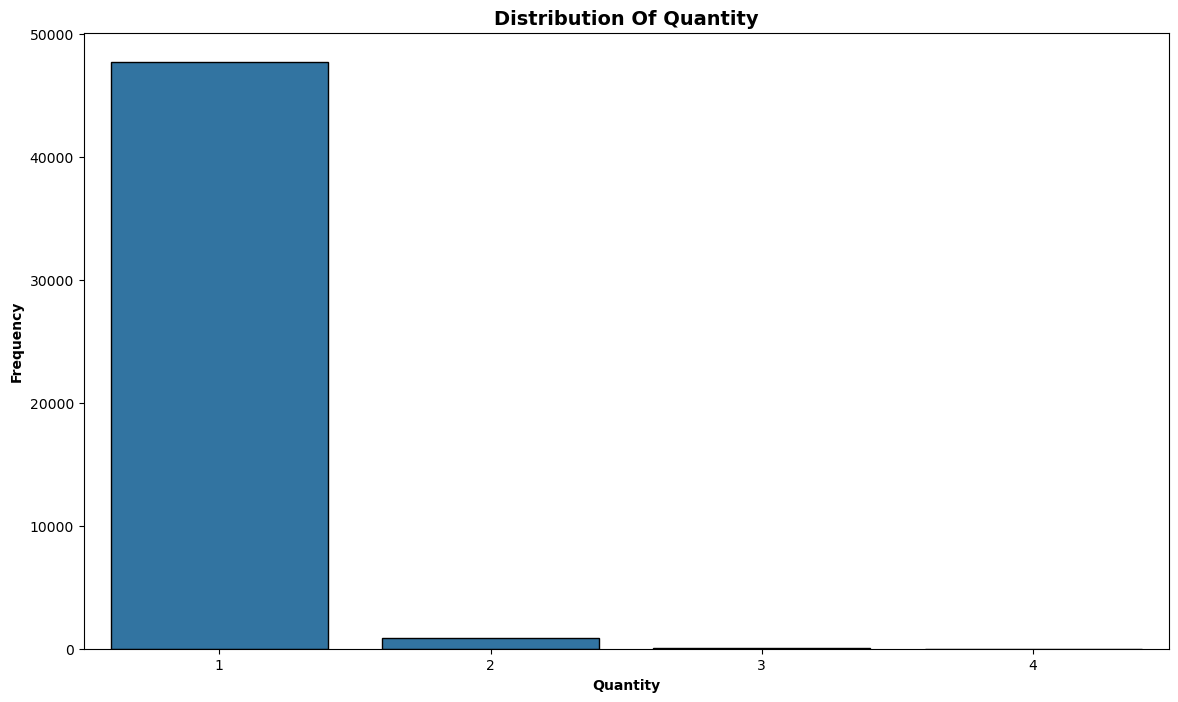

In [18]:
CountPlots(data, 'quantity')

## Distribution of orders over the months

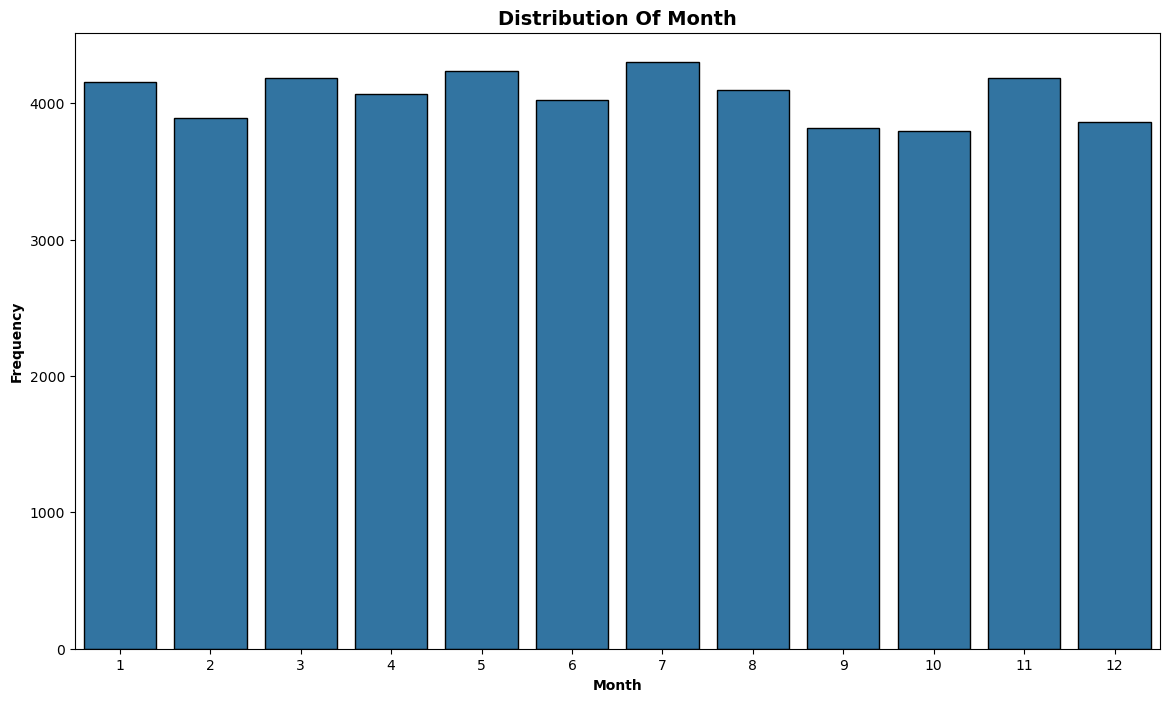

In [15]:
CountPlots(data, 'month')

## Distribution of oders on different sizes

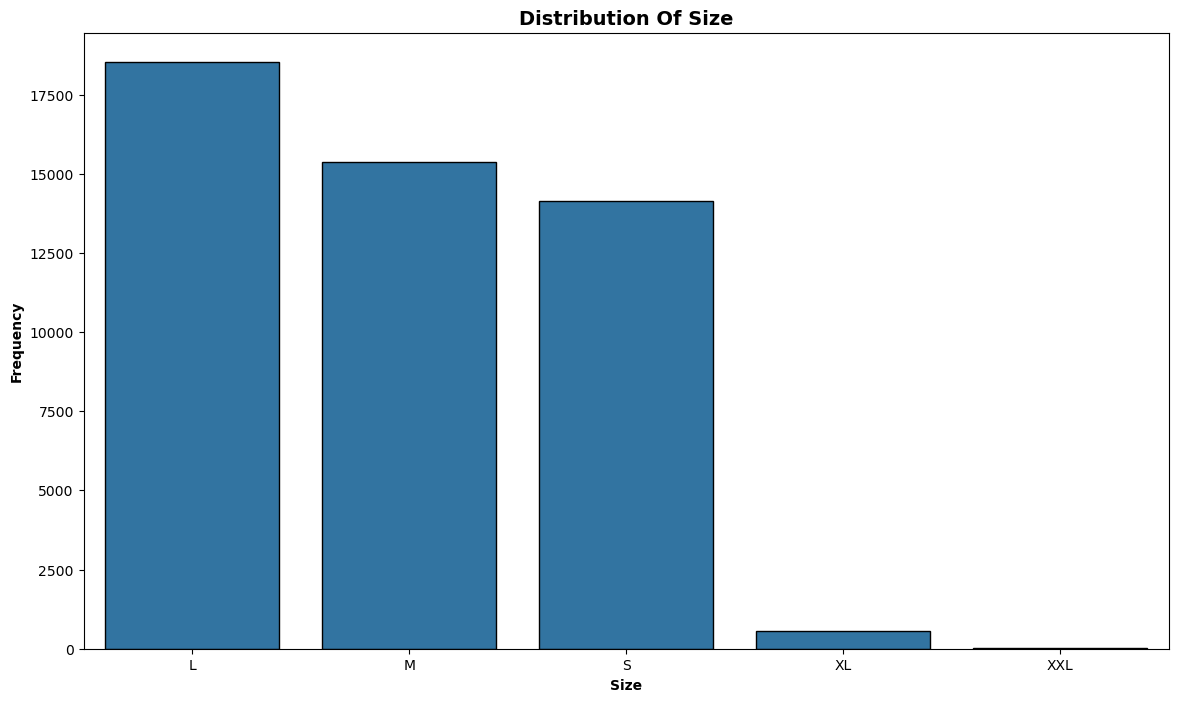

In [13]:
CountPlots(data, 'size')

In [ ]:
CountPlots(data, 'day')

## Which day of the wek had more sales overall

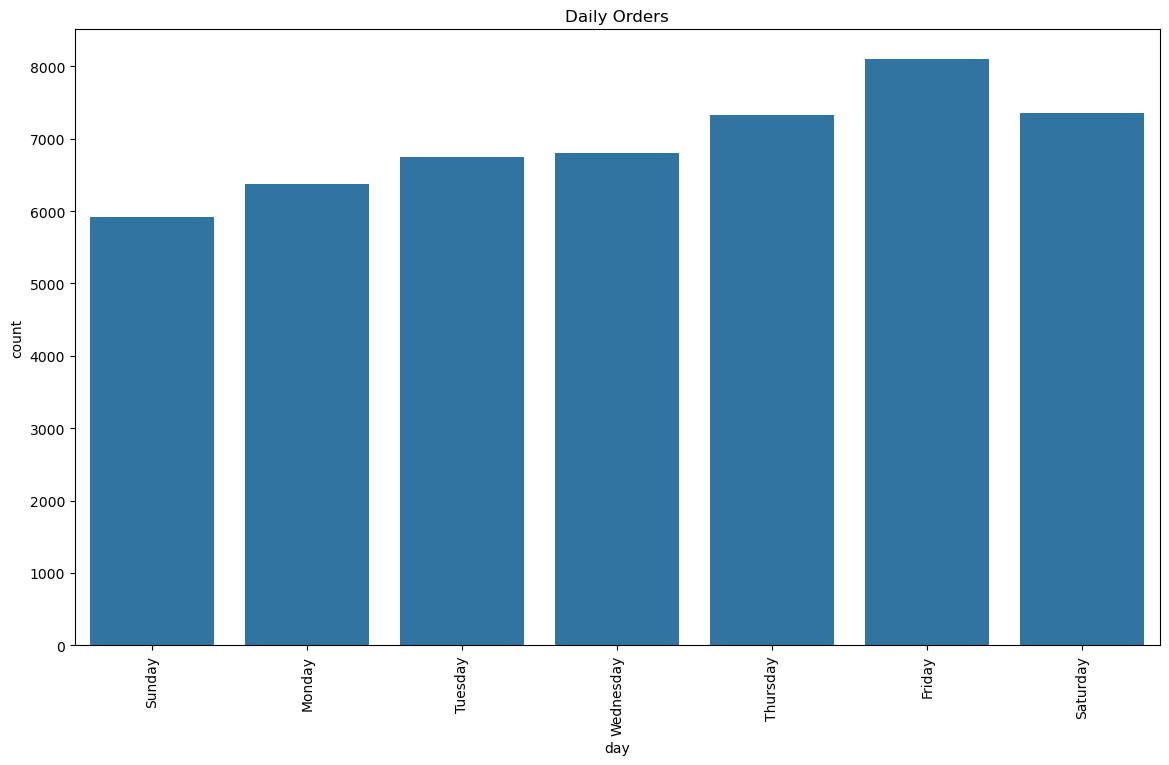

In [20]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[14, 8]);
days_of_the_week = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
plt.xticks(rotation=90);
plt.title('Daily Orders on different days of the week');
sb.countplot(data = data, x = 'day', order = days_of_the_week, color = base_color);

## From the plot above we can establish that Friday had the most orders while Sunday had the least

# Question
## Which category of pizza is more popular

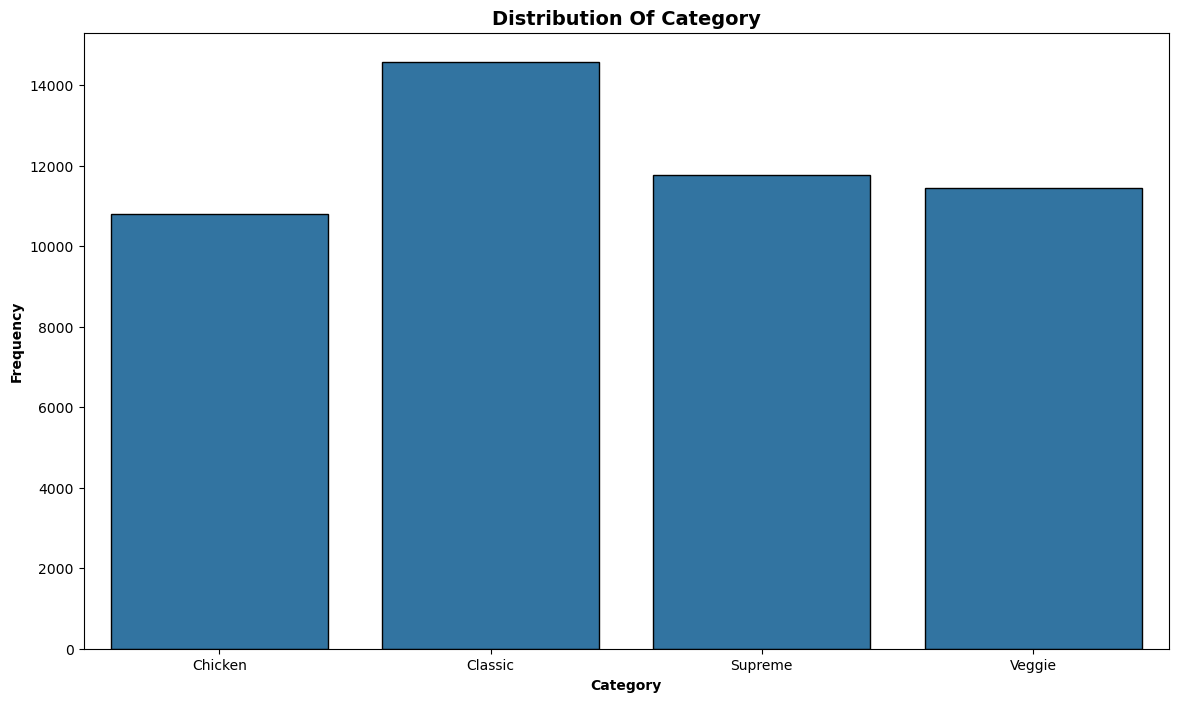

In [13]:
CountPlots(data, 'category');

## Bivariate Exploration

## Multivariate Exploration